Data source: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

In [65]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [67]:
df = pd.read_csv('../data/raw/onlinefraud.csv')
display(df, df.dtypes, df.isnull().any(), df.duplicated())

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Length: 6362620, dtype: bool

In [68]:
display(df.duplicated().any())

False

### Feature Engineering working on payment transactions

In [70]:
df['balanceOrigDiff'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDestDiff'] = df['newbalanceDest'] - df['oldbalanceDest']

In [71]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,339682.13,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00,False,False,False,True


In [72]:
df['log_amount'] = np.log1p(df['amount'])
df['log_oldbalanceOrg'] = np.log1p(df['oldbalanceOrg'])
df['log_oldbalanceDest'] = np.log1p(df['oldbalanceDest'])

In [73]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrigDiff,balanceDestDiff,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,log_amount,log_oldbalanceOrg,log_oldbalanceDest
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,9839.64,0.00,False,False,True,False,9.194276,12.044359,0.000000
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,1864.28,0.00,False,False,True,False,7.531166,9.964112,0.000000
2,1,181.00,181.00,0.00,0.00,0.00,1,0,181.00,0.00,False,False,False,True,5.204007,5.204007,0.000000
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,181.00,-21182.00,True,False,False,False,5.204007,5.204007,9.960954
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,11668.14,0.00,False,False,True,False,9.364703,10.634773,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,339682.13,339682.13,True,False,False,False,12.735768,12.735768,0.000000
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,6311409.28,0.00,False,False,False,True,15.657870,15.657870,0.000000
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,6311409.28,6311409.27,True,False,False,False,15.657870,15.657870,11.134441
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,850002.52,0.00,False,False,False,True,13.652996,13.652996,0.000000


### KNN Test

In [130]:
features = ['step', 'balanceOrigDiff', 'balanceDestDiff', 'log_amount', 'log_oldbalanceOrg', 'log_oldbalanceDest', 
            'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']

X = df[features]
y = df['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [134]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [135]:
# Predict on the test set
y_pred = knn.predict(X_test)

In [136]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.00


In [137]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270883
           1       0.87      0.56      0.68      1641

    accuracy                           1.00   1272524
   macro avg       0.94      0.78      0.84   1272524
weighted avg       1.00      1.00      1.00   1272524



In [159]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1270781     102]
 [    869     772]]


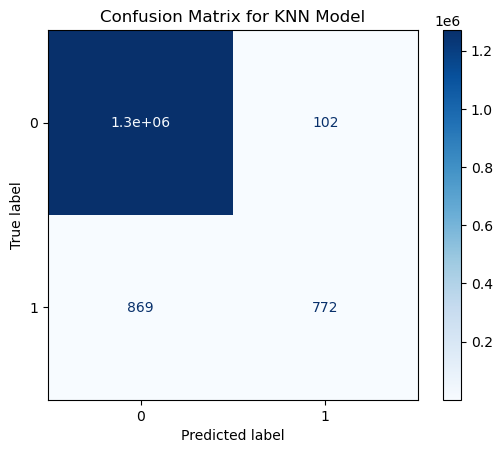

In [163]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)  # You can use different color maps if you like
plt.title("Confusion Matrix for KNN Model")
plt.show()

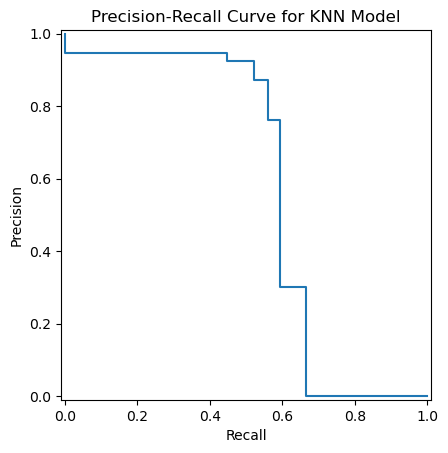

In [168]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

# Get the prediction probabilities
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Display precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve for KNN Model")
plt.show()